In [73]:
import pandas as pd
import numpy as np

In [74]:
# Read in the CSV data
df_org = pd.read_csv('sp500/AAPL.csv')
df = df_org.copy()

In [75]:
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
...,...,...,...,...,...,...,...
10585,06-12-2022,141.919998,147.070007,64727200,147.300003,142.910004,142.910004
10586,07-12-2022,140.000000,142.190002,69721100,143.369995,140.940002,140.940002
10587,08-12-2022,141.100006,142.360001,62128300,143.520004,142.649994,142.649994
10588,09-12-2022,140.899994,142.339996,76069500,145.570007,142.160004,142.160004


In [76]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y")


# Extract the year, month, and day as separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(columns=['Date'])

In [77]:
start_year = 2011
test_year = 2022

In [78]:
df_train = df[df['Year']>(start_year-1)]
df_test = df_train[df_train['Year']> (test_year-1)].to_numpy()
df_train = df_train[df_train['Year']<test_year].to_numpy()

In [79]:
def create_sequences(data, t, col):
    X, y = [], []
    for i in range(len(data)-t-1):
        a = data[i:(i+t), :]
        X.append(a)
        y.append(data[i + t, col])
    
    X = np.array(X)
    X = X.reshape(X.shape[0], (X.shape[1]*X.shape[2]))
    return X, np.array(y)

In [80]:
t = 10 #Number of days to loock back
target = "Close"

predict_col = list(df.columns.values).index(target)

X_train, y_train = create_sequences(df_train, t, predict_col)
X_test, y_test = create_sequences(df_test, t, predict_col)

In [81]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=5,ignore_warnings=True, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

  2%|▏         | 1/42 [00:02<02:01,  2.96s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.814766384557832, 'Adjusted R-Squared': 0.6921853155152209, 'RMSE': 5.129872460957102, 'Time taken': 2.9640958309173584}


  5%|▍         | 2/42 [00:06<02:20,  3.51s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8160403535339795, 'Adjusted R-Squared': 0.6943023521961718, 'RMSE': 5.112201332509813, 'Time taken': 3.8856091499328613}
{'Model': 'BayesianRidge', 'R-Squared': 0.912454175746119, 'Adjusted R-Squared': 0.8545194391075213, 'RMSE': 3.526666431838812, 'Time taken': 0.033393144607543945}


 14%|█▍        | 6/42 [00:07<00:29,  1.21it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.7339045758815022, 'Adjusted R-Squared': 0.5578120158030844, 'RMSE': 6.148446086477439, 'Time taken': 0.5614988803863525}
{'Model': 'DummyRegressor', 'R-Squared': -84.18769405827415, 'Adjusted R-Squared': -140.5619033615438, 'RMSE': 110.01074285945947, 'Time taken': 0.014960289001464844}
{'Model': 'ElasticNet', 'R-Squared': 0.7276541181474772, 'Adjusted R-Squared': 0.5474252257450722, 'RMSE': 6.220239007274537, 'Time taken': 0.13065147399902344}


 19%|█▉        | 8/42 [00:08<00:21,  1.58it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7963579305989392, 'Adjusted R-Squared': 0.6615947964364726, 'RMSE': 5.378738330847406, 'Time taken': 0.6741981506347656}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.7386541257766635, 'Adjusted R-Squared': 0.5657046501876908, 'RMSE': 6.093327070090004, 'Time taken': 0.2044529914855957}


 21%|██▏       | 9/42 [00:20<02:07,  3.87s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8094704126209044, 'Adjusted R-Squared': 0.6833846562670911, 'RMSE': 5.20268916263619, 'Time taken': 12.436779260635376}


 24%|██▍       | 10/42 [00:21<01:31,  2.85s/it]

{'Model': 'GammaRegressor', 'R-Squared': -14.110700068035412, 'Adjusted R-Squared': -24.110428054235317, 'RMSE': 46.33284398692736, 'Time taken': 0.22377276420593262}


 26%|██▌       | 11/42 [00:22<01:11,  2.29s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -129.88191947616227, 'Adjusted R-Squared': -216.4949544236226, 'RMSE': 136.35984341988097, 'Time taken': 0.9235315322875977}


 29%|██▊       | 12/42 [00:36<02:51,  5.70s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8490213712734521, 'Adjusted R-Squared': 0.7491090434397072, 'RMSE': 4.631315892450589, 'Time taken': 14.011049270629883}


 33%|███▎      | 14/42 [00:37<01:29,  3.19s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.7419985509634399, 'Adjusted R-Squared': 0.5712622979245399, 'RMSE': 6.054213590227925, 'Time taken': 1.4102287292480469}
{'Model': 'HuberRegressor', 'R-Squared': 0.8944718527830047, 'Adjusted R-Squared': 0.82463704947764, 'RMSE': 3.8719596483242458, 'Time taken': 0.20744609832763672}


 36%|███▌      | 15/42 [00:37<01:01,  2.29s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.920725449884189, 'Adjusted R-Squared': -2.1917937623075496, 'RMSE': 16.518831055346617, 'Time taken': 0.14960026741027832}


 38%|███▊      | 16/42 [00:38<00:43,  1.68s/it]

{'Model': 'KernelRidge', 'R-Squared': -13.580980690822507, 'Adjusted R-Squared': -23.23015908916093, 'RMSE': 45.51347896978763, 'Time taken': 0.25531744956970215}
{'Model': 'Lars', 'R-Squared': -18349587.10428134, 'Adjusted R-Squared': -30492696.879173405, 'RMSE': 51057.53292429766, 'Time taken': 0.033908843994140625}


 43%|████▎     | 18/42 [00:38<00:23,  1.04it/s]

{'Model': 'LarsCV', 'R-Squared': 0.7589337884768032, 'Adjusted R-Squared': 0.5994046779099818, 'RMSE': 5.852141755788659, 'Time taken': 0.20844388008117676}
{'Model': 'Lasso', 'R-Squared': 0.8409684501542998, 'Adjusted R-Squared': 0.7357269833446451, 'RMSE': 4.753224333324584, 'Time taken': 0.09472203254699707}


 48%|████▊     | 20/42 [00:38<00:14,  1.51it/s]

{'Model': 'LassoCV', 'R-Squared': 0.878937464112532, 'Adjusted R-Squared': 0.79882255065759, 'RMSE': 4.147167242326266, 'Time taken': 0.2952117919921875}
{'Model': 'LassoLars', 'R-Squared': 0.8712463495407279, 'Adjusted R-Squared': 0.7860417279132683, 'RMSE': 4.2768738604044785, 'Time taken': 0.019948482513427734}


 52%|█████▏    | 22/42 [00:38<00:09,  2.15it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9132469667801817, 'Adjusted R-Squared': 0.8558368712670666, 'RMSE': 3.5106618529648257, 'Time taken': 0.22040820121765137}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9128512177498749, 'Adjusted R-Squared': 0.8551792294961156, 'RMSE': 3.5186601909256834, 'Time taken': 0.04787302017211914}
{'Model': 'LinearRegression', 'R-Squared': 0.911495990109902, 'Adjusted R-Squared': 0.8529271600355725, 'RMSE': 3.545913523850393, 'Time taken': 0.022938251495361328}


 60%|█████▉    | 25/42 [00:39<00:05,  3.03it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.908002305977009, 'Adjusted R-Squared': 0.8471214790500297, 'RMSE': 3.615223379307794, 'Time taken': 0.39397215843200684}


 62%|██████▏   | 26/42 [00:42<00:12,  1.29it/s]

{'Model': 'MLPRegressor', 'R-Squared': 0.4914047672160039, 'Adjusted R-Squared': 0.1548343925795358, 'RMSE': 8.500271719822358, 'Time taken': 2.9037272930145264}


 71%|███████▏  | 30/42 [00:42<00:04,  2.58it/s]

{'Model': 'NuSVR', 'R-Squared': -8.104894208264701, 'Adjusted R-Squared': -14.13019184608693, 'RMSE': 35.96533567530932, 'Time taken': 0.33510327339172363}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9141183710450291, 'Adjusted R-Squared': 0.8572849401189455, 'RMSE': 3.4929856600419824, 'Time taken': 0.01795339584350586}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9141684237697294, 'Adjusted R-Squared': 0.8573681159702856, 'RMSE': 3.491967637137228, 'Time taken': 0.0428464412689209}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8770730340893178, 'Adjusted R-Squared': 0.7957243066484252, 'RMSE': 4.17897956331724, 'Time taken': 0.042885780334472656}
{'Model': 'PoissonRegressor', 'R-Squared': -5.234625155261391, 'Adjusted R-Squared': -9.360480037419665, 'RMSE': 29.761296035262006, 'Time taken': 0.06881570816040039}


 76%|███████▌  | 32/42 [06:19<08:33, 51.38s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -110.4615684837772, 'Adjusted R-Squared': -184.22290056862977, 'RMSE': 125.83725646667021, 'Time taken': 336.38240361213684}
{'Model': 'RANSACRegressor', 'R-Squared': 0.9122430517321424, 'Adjusted R-Squared': 0.8541686006725306, 'RMSE': 3.5309162954125908, 'Time taken': 0.09474587440490723}


 88%|████████▊ | 37/42 [06:58<02:06, 25.36s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8109125290284077, 'Adjusted R-Squared': 0.685781114414854, 'RMSE': 5.182962214175839, 'Time taken': 39.26049280166626}
{'Model': 'Ridge', 'R-Squared': 0.9098484078925344, 'Adjusted R-Squared': 0.8501892660567116, 'RMSE': 3.5787665259840367, 'Time taken': 0.017464876174926758}
{'Model': 'RidgeCV', 'R-Squared': 0.9126991355489962, 'Adjusted R-Squared': 0.8549265046623025, 'RMSE': 3.5217290366139733, 'Time taken': 0.0299224853515625}
{'Model': 'SGDRegressor', 'R-Squared': 0.8392420303484227, 'Adjusted R-Squared': 0.7328580798437024, 'RMSE': 4.7789547931145755, 'Time taken': 0.0718085765838623}


 93%|█████████▎| 39/42 [06:59<00:55, 18.53s/it]

{'Model': 'SVR', 'R-Squared': -8.269938150576458, 'Adjusted R-Squared': -14.404456044340291, 'RMSE': 36.289842581663606, 'Time taken': 0.536588191986084}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.911495990109902, 'Adjusted R-Squared': 0.8529271600355725, 'RMSE': 3.545913523850393, 'Time taken': 0.021918296813964844}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7197593405877366, 'Adjusted R-Squared': 0.5343059630355034, 'RMSE': 6.30975126193362, 'Time taken': 0.0279238224029541}


 98%|█████████▊| 41/42 [07:00<00:13, 13.45s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.673451736811885, 'Adjusted R-Squared': 0.4573536214668088, 'RMSE': 6.811148595371463, 'Time taken': 0.8048489093780518}
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15870
[LightGBM] [Info] Number of data points in the train set: 2758, number of used features: 90
[LightGBM] [Info] Start training from score 45.838357


100%|██████████| 42/42 [07:00<00:00, 10.01s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7349494076670406, 'Adjusted R-Squared': 0.5595482803878764, 'RMSE': 6.136363183448852, 'Time taken': 0.24933505058288574}


In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [46]:
y_pred = reg.predict(X_test)

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9114959926639469

In [47]:
from sklearn.metrics import mean_absolute_percentage_error as mape
mape(y_test, y_pred)

0.01855938417457285

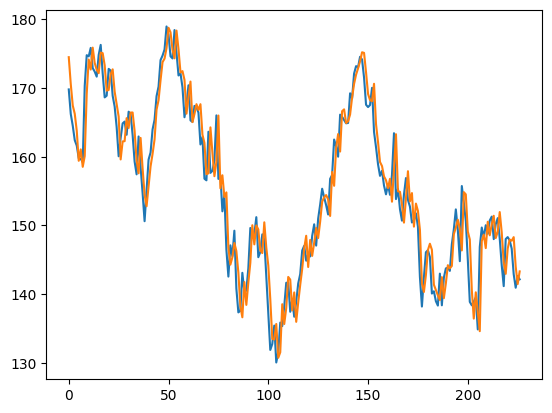

In [48]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [56]:
y_poly = pol_reg.predict(X_poly_test)

In [58]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape(y_test, y_poly)

0.2799705892105988

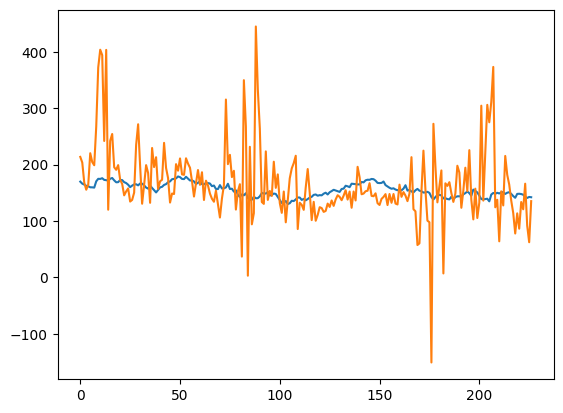

In [60]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_poly)

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

In [62]:
y_poly = pol_reg.predict(X_poly_test)

In [63]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape(y_test, y_poly)

0.019637591252699378

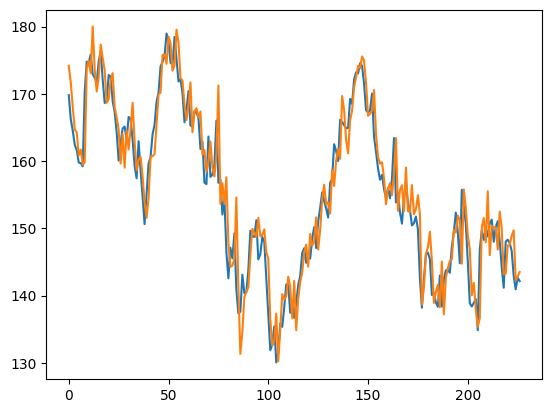

In [64]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_poly)